# Weather Influence on Energy Consumption of a Building

- Created by Clayton Miller - clayton@nus.edu.sg - miller.clayton@gmail.com

We learned in the last notebook that the floor area is a good normalizing factor for energy consumption. The question we will look into now is how weather influences energy consumption



In [1]:
import pandas as pd
#from google.colab import drive
import os

In [2]:
%matplotlib inline

In [3]:
#drive.mount('/content/gdrive')
#os.chdir("meter_data")

In [4]:
rawdata = pd.read_csv("UnivClass_Ciara.csv", parse_dates=True, index_col='timestamp')

In [5]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UnivClass_Ciara  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


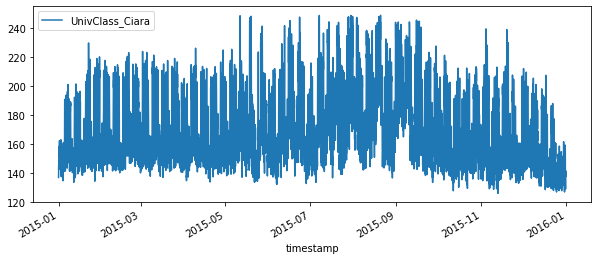

In [6]:
rawdata.plot(figsize=(10,4))

# Load the weather data file - Cleaning Data and Dealing with Missing Data

In this case, we will use weather data files to supplement the analysis and converge two different datasets

First we will have to find the right weather file (can be found in the `meta.csv` file manually). For this building, the weather file is `weather2.csv`

In [7]:
#os.chdir("C:\\Users\\Dennis\\Documents\\EDX Data Science for Construction, Architecture and Engineering\\Week 3 - Construction - Pandas Fundamentals\\weather_data")
weather_data = pd.read_csv("weather2.csv", index_col='timestamp', parse_dates=True)

In [8]:
weather_data.head()

,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,TimeEDT,TimeEST,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1
timestamp,,,,,,,,,,,,,,,,
2015-01-01 00:56:00,Overcast,2015-01-01 05:56:00<br />,-15.0,NaN,-,54.0,NaN,1017.4,-7.2,NaN,12:56 AM,16.1,SW,18.5,230,2015-01-01 00:56:00
2015-01-01 01:56:00,Overcast,2015-01-01 06:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,NaN,1:56 AM,16.1,WSW,14.8,240,2015-01-01 01:56:00
2015-01-01 02:56:00,Overcast,2015-01-01 07:56:00<br />,-14.4,NaN,-,55.0,NaN,1016.9,-6.6,NaN,2:56 AM,16.1,SW,14.8,220,2015-01-01 02:56:00
2015-01-01 03:56:00,Overcast,2015-01-01 08:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,NaN,3:56 AM,16.1,SW,18.5,220,2015-01-01 03:56:00
2015-01-01 04:56:00,Overcast,2015-01-01 09:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,NaN,4:56 AM,16.1,SSW,14.8,210,2015-01-01 04:56:00


In [9]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10914 entries, 2015-01-01 00:56:00 to 2015-12-31 21:56:00
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Conditions             10914 non-null  object 
 1   DateUTC<br />          10914 non-null  object 
 2   Dew PointC             10914 non-null  float64
 3   Events                 2555 non-null   object 
 4   Gust SpeedKm/h         10914 non-null  object 
 5   Humidity               10878 non-null  float64
 6   Precipitationmm        2945 non-null   float64
 7   Sea Level PressurehPa  10914 non-null  float64
 8   TemperatureC           10914 non-null  float64
 9   TimeEDT                7104 non-null   object 
 10  TimeEST                3810 non-null   object 
 11  VisibilityKm           10914 non-null  float64
 12  Wind Direction         10914 non-null  object 
 13  Wind SpeedKm/h         10914 non-null  object 
 14  WindDirDegrees     

Let's take a look at the data

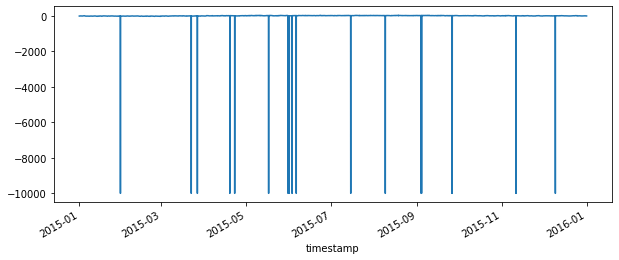

In [10]:
weather_data["TemperatureC"].plot(figsize=(10,4));

## Finding and removing outliers

Looks like there are quite a few readings in this data set that are very unprobable -- temperature below 10,000 Deg C is physically impossible. 

This is a common scenario with IoT devices and we can filter those outlier and fill the gaps 

In [11]:
weather_hourly = weather_data.resample("H").mean()

In [12]:
weather_hourly_nooutlier = weather_hourly[weather_hourly > -40]

In [13]:
weather_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8758 entries, 2015-01-01 00:00:00 to 2015-12-31 21:00:00
Freq: H
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dew PointC             8567 non-null   float64
 1   Humidity               8564 non-null   float64
 2   Precipitationmm        1881 non-null   float64
 3   Sea Level PressurehPa  8567 non-null   float64
 4   TemperatureC           8567 non-null   float64
 5   VisibilityKm           8567 non-null   float64
 6   WindDirDegrees         8567 non-null   float64
dtypes: float64(7)
memory usage: 547.4 KB


In [14]:
weather_hourly_nooutlier.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8758 entries, 2015-01-01 00:00:00 to 2015-12-31 21:00:00
Freq: H
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dew PointC             8543 non-null   float64
 1   Humidity               8564 non-null   float64
 2   Precipitationmm        1881 non-null   float64
 3   Sea Level PressurehPa  8544 non-null   float64
 4   TemperatureC           8544 non-null   float64
 5   VisibilityKm           8542 non-null   float64
 6   WindDirDegrees         8567 non-null   float64
dtypes: float64(7)
memory usage: 547.4 KB


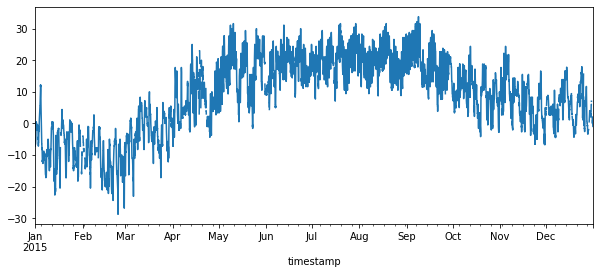

In [15]:
weather_hourly_nooutlier["TemperatureC"].plot(figsize=(10,4));

## Filling gaps in data

We can fill the gap left by filtering the outliers by using the `.fillna()` function

In [16]:
weather_hourly_nooutlier_nogaps = weather_hourly_nooutlier.fillna(method='ffill')

In [17]:
weather_hourly_nooutlier_nogaps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8758 entries, 2015-01-01 00:00:00 to 2015-12-31 21:00:00
Freq: H
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dew PointC             8758 non-null   float64
 1   Humidity               8758 non-null   float64
 2   Precipitationmm        8731 non-null   float64
 3   Sea Level PressurehPa  8758 non-null   float64
 4   TemperatureC           8758 non-null   float64
 5   VisibilityKm           8758 non-null   float64
 6   WindDirDegrees         8758 non-null   float64
dtypes: float64(7)
memory usage: 547.4 KB


# Merge Temperature and Electricity Data - Combining Data Sets

Once again, we need to converge two data sets -- this time we will use both the `.concat()` and the `.merge()` function to show the differences

In [18]:
weather_hourly_nooutlier_nogaps['TemperatureC'].head()

timestamp
2015-01-01 00:00:00   -7.2
2015-01-01 01:00:00   -6.6
2015-01-01 02:00:00   -6.6
2015-01-01 03:00:00   -6.6
2015-01-01 04:00:00   -6.6
Freq: H, Name: TemperatureC, dtype: float64

In [19]:
rawdata = rawdata[~rawdata.index.duplicated(keep='first')]

In [20]:
rawdata['UnivClass_Ciara'].head()

timestamp
2015-01-01 00:00:00    136.824997
2015-01-01 01:00:00    144.025002
2015-01-01 02:00:00    144.875000
2015-01-01 03:00:00    142.375000
2015-01-01 04:00:00    148.199997
Name: UnivClass_Ciara, dtype: float64

## Using `.concat()` to combine data sets

In [21]:
comparison = pd.concat([weather_hourly_nooutlier_nogaps['TemperatureC'], rawdata['UnivClass_Ciara']], axis=1)

In [22]:
comparison.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Freq: H
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TemperatureC     8758 non-null   float64
 1   UnivClass_Ciara  8759 non-null   float64
dtypes: float64(2)
memory usage: 205.3 KB


In [23]:
comparison.head()

,TemperatureC,UnivClass_Ciara
timestamp,,
2015-01-01 00:00:00,-7.2,136.824997
2015-01-01 01:00:00,-6.6,144.025002
2015-01-01 02:00:00,-6.6,144.875000
2015-01-01 03:00:00,-6.6,142.375000
2015-01-01 04:00:00,-6.6,148.199997


## Using the `.merge()` function

the `.merge()` function is useful in converging data sets that don't fit perfectly together. Merge has several additional attributes that indicate which columns will be merged upon and **how** the merge will occur.

Refer to Pandas cheat sheet for more information: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [24]:
comparison_merged = pd.merge(weather_hourly_nooutlier_nogaps['TemperatureC'], rawdata['UnivClass_Ciara'], left_index=True, right_index=True, how='outer')

In [25]:
comparison_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TemperatureC     8758 non-null   float64
 1   UnivClass_Ciara  8759 non-null   float64
dtypes: float64(2)
memory usage: 205.3 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013122417DC8>,
      dtype=object)

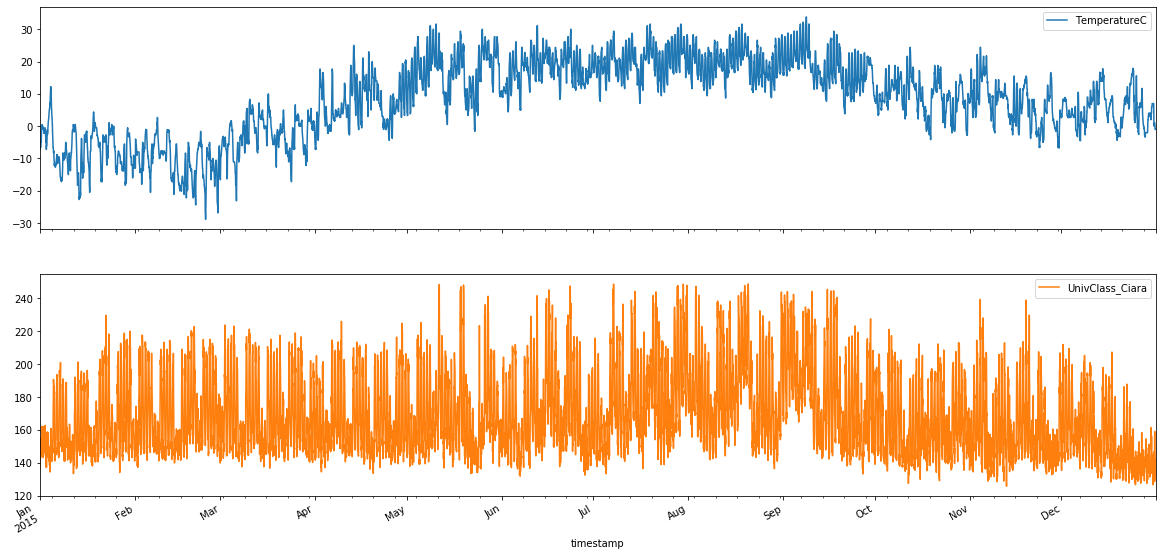

In [26]:
comparison.plot(figsize=(20,10), subplots=True)

# Analyze the weather influence on energy consumption

In order to understand how weather and energy are related -- we will use a `scatterplot` to visualize the comparison

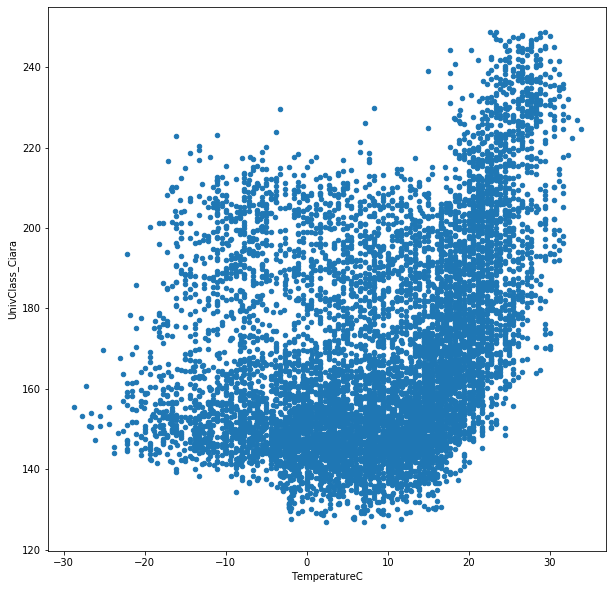

In [27]:
comparison.plot(kind='scatter', x='TemperatureC', y='UnivClass_Ciara', figsize=(10,10))

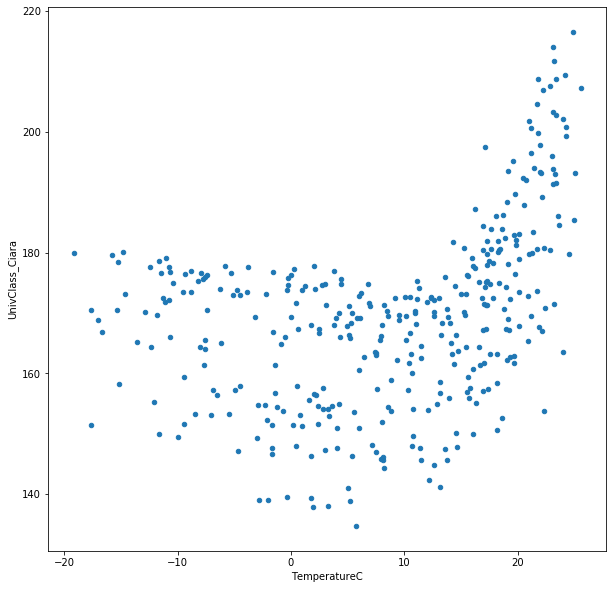

In [28]:
comparison.resample("D").mean().plot(kind='scatter', x='TemperatureC', y='UnivClass_Ciara', figsize=(10,10))

# Advanced Visualizations using Seaborn

It looks there are two linear models with a change point happening in this situation - let's use some more advanced visualization techniques using the Seaborn library to visualize the two regions and draw a regression line between them

https://seaborn.pydata.org/

In [29]:
import seaborn as sns

In [30]:
comparison.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Freq: H
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TemperatureC     8758 non-null   float64
 1   UnivClass_Ciara  8759 non-null   float64
dtypes: float64(2)
memory usage: 205.3 KB


In [31]:
comparison[comparison.TemperatureC > 14].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3269 entries, 2015-04-02 12:00:00 to 2015-12-25 14:00:00
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TemperatureC     3269 non-null   float64
 1   UnivClass_Ciara  3269 non-null   float64
dtypes: float64(2)
memory usage: 76.6 KB


In [32]:
def make_color_division(x):
  if x < 14:
    return "Heating"
  else:
    return "Cooling"

In [33]:
comparison = comparison.resample("D").mean()

In [34]:
comparison['heating_vs_cooling'] = comparison.TemperatureC.apply(lambda x: make_color_division(x))

In [35]:
comparison.head()

,TemperatureC,UnivClass_Ciara,heating_vs_cooling
timestamp,,,
2015-01-01,-3.027083,149.362500,Heating
2015-01-02,-1.704167,151.513542,Heating
2015-01-03,-1.707639,147.725000,Heating
2015-01-04,7.135417,148.089584,Heating
2015-01-05,-7.598958,163.968750,Heating


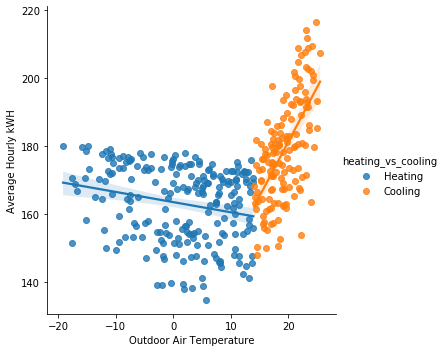

In [36]:
g = sns.lmplot(x="TemperatureC", y="UnivClass_Ciara", hue="heating_vs_cooling",
               truncate=True, data=comparison)

g.set_axis_labels("Outdoor Air Temperature", "Average Hourly kWH")